In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [2]:
import os
os.getcwd()

'/Users/damini'

In [3]:
df = pd.read_csv("/Users/damini/Downloads/bank_marketing_part1_Data.csv")


## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [8]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [9]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) 

Number of duplicate rows = 0


##### OUTLIER TREATMENT :

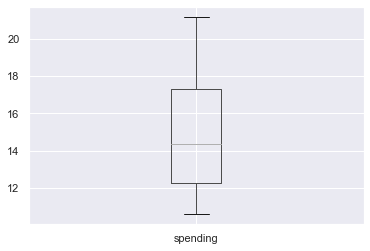

In [11]:
df.boxplot(column=['spending'])
plt.show()

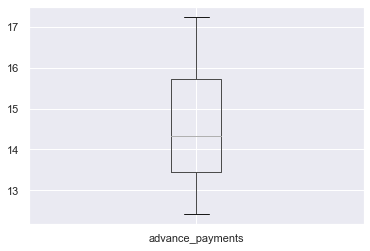

In [12]:
df.boxplot(column=['advance_payments'])
plt.show()

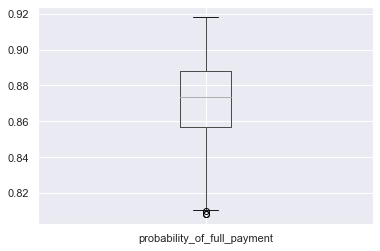

In [13]:
df.boxplot(column=['probability_of_full_payment'])
plt.show()

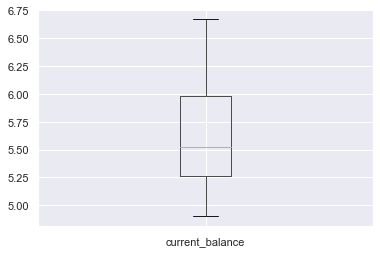

In [14]:
df.boxplot(column=['current_balance'])
plt.show()

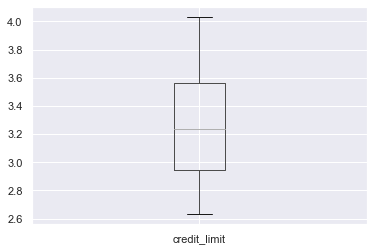

In [15]:
df.boxplot(column=['credit_limit'])
plt.show()

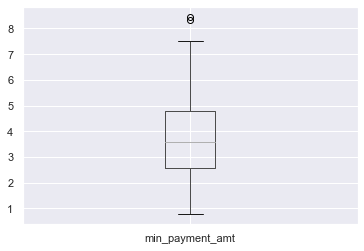

In [16]:
df.boxplot(column=['min_payment_amt'])
plt.show()

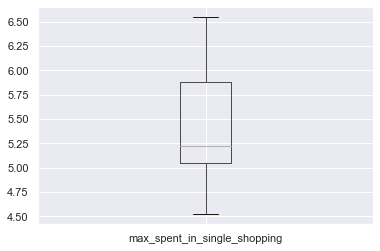

In [17]:
df.boxplot(column=['max_spent_in_single_shopping'])
plt.show()

##### Looking at the box plot, it seems that the two variables probability_of_full_payment and min_payment_amt have outlier present in the variables that to negligible.                                                                               

#### OBSERVATIONS :

1. There are seven columns in the bank marketing dataset.                                                   
spending: Amount spent by the customer per month (in 1000s)                           
advance_payments: Amount paid by the customer in advance by cash (in 100s)                                  
probability_of_full_payment: Probability of payment done in full by the customer to the bank                     
current_balance: Balance amount left in the account to make purchases (in 1000s)                                
credit_limit: Limit of the amount in credit card (10000s)                                                      
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)         
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)                                  
   
2. The number of rows in the dataframe is 210 and the number of columns in the dataframe is 7 .

3. All the columns are in float datatype.

4. There are no missing values.

5. There are no duplicates.

6. There is almost no outliers in the data except for Probability_of_full_payment and min_payment_amount.


##### Univariate Analysis :

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spending', ylabel='Density'>

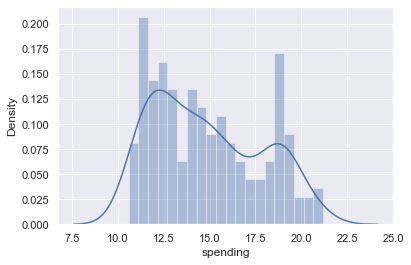

In [18]:
sns.distplot(df.spending,bins=20)

From above figure, we can say that the spending parameter is right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='advance_payments', ylabel='Density'>

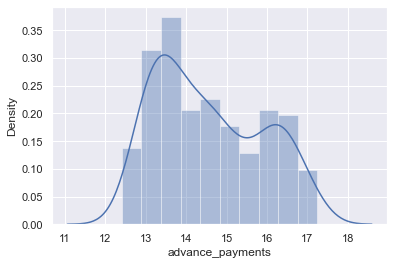

In [19]:
sns.distplot(df.advance_payments,bins=10)

From above figure, we can say that the advance_payments parameter is right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='probability_of_full_payment', ylabel='Density'>

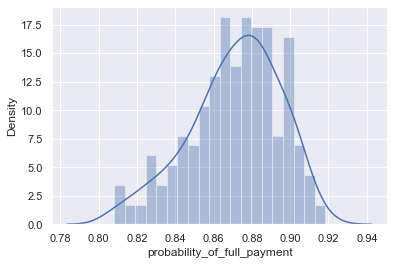

In [20]:
sns.distplot(df.probability_of_full_payment,bins=20)

From above figure, we can say that the probability_of_full_payment parameter is close to normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='current_balance', ylabel='Density'>

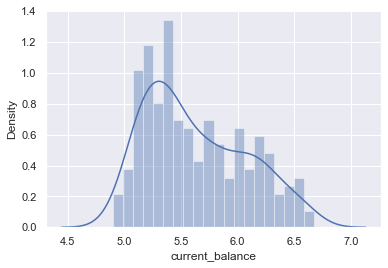

In [21]:
sns.distplot(df.current_balance,bins=20)

From above figure, we can say that the curent_balance parameter is slightly right skewed.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_limit', ylabel='Density'>

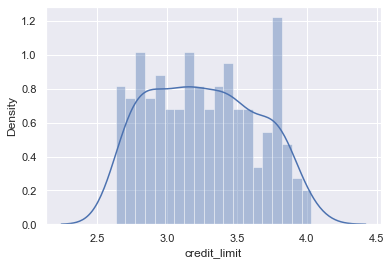

In [22]:
sns.distplot(df.credit_limit,bins=20)

From above figure, we can say that the credit_limit shows some consistency in the middle of the curve.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_payment_amt', ylabel='Density'>

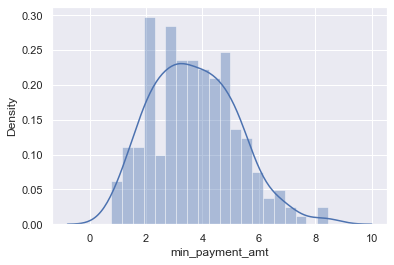

In [23]:
sns.distplot(df.min_payment_amt,bins=20)

From above figure, we can say that the min_full_payment_amt parameter is close to normal distribution.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Density'>

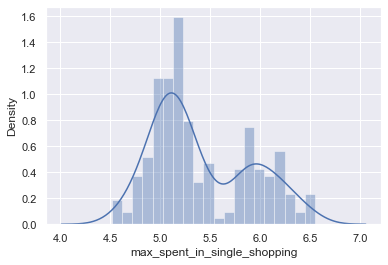

In [24]:
sns.distplot(df.max_spent_in_single_shopping,bins=20)

From above figure, we can say that the max_spent_in_single_shopping parameter is right skewed.

##### Bivariate Analysis :

<Figure size 1440x1440 with 0 Axes>

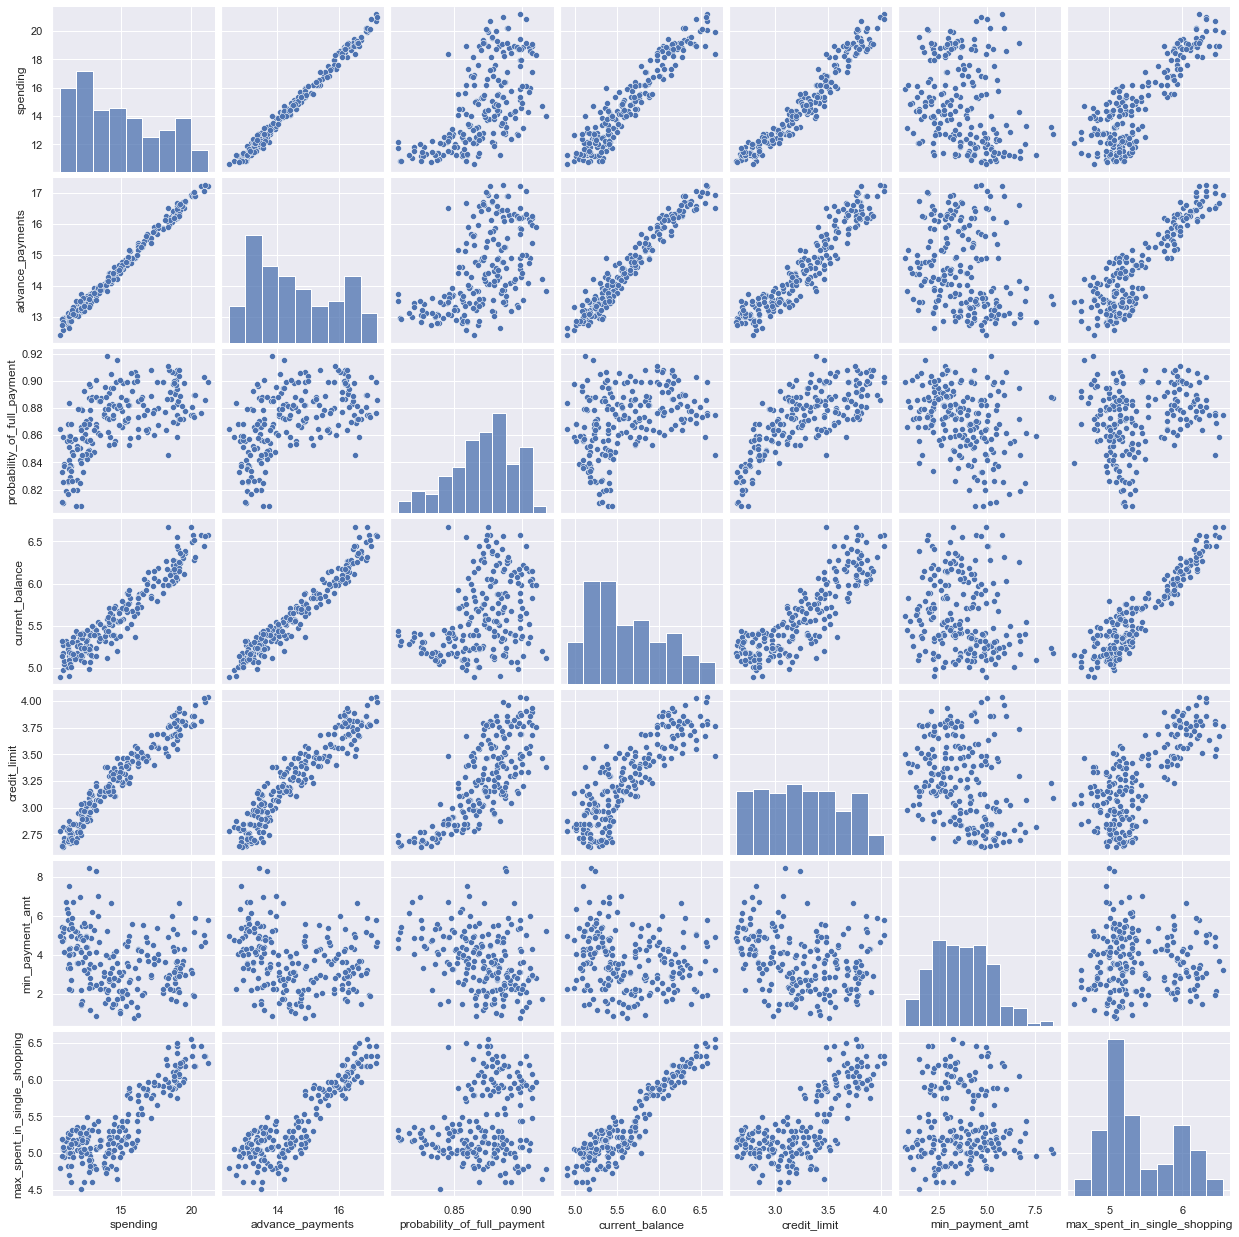

In [25]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

 The bivariate analysis shown using a pairplot is a visual representation of the degree of correlation between any two columns. 

In [26]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


##### Multivariate Analysis : ( HEAT MAP)

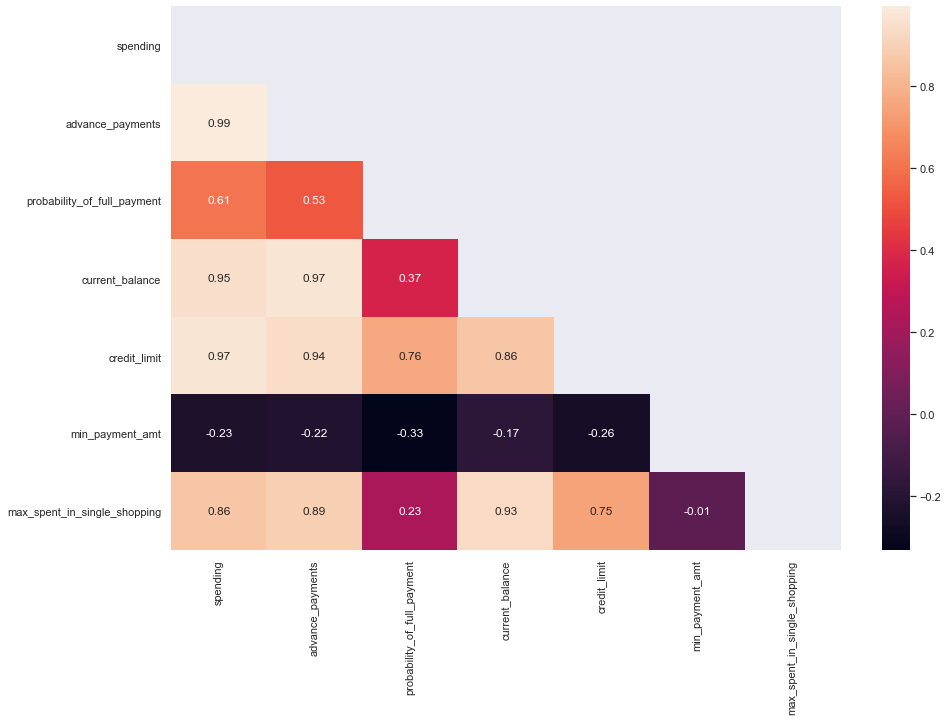

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",mask=np.triu(df.corr(),0));

#### OBSERVATION :

The highest correlation is seen between advance payments and spendings, as most of the spending is done in making advanced payments then credit limit is seen highly correlated to spending and current balance seen very much correlated to advance payments etc.

### 1.2  Do you think scaling is necessary for clustering in this case? Justify



In [28]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

##### COMMENT :
 Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100.

 For e.g. in our data set advance payment is having values in hunders and credit limit is  in four digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.                                 

 ##### In this method, we convert variables with different scales of measurements into a single scale.
 ##### StandardScaler normalizes the data using the formula (x-mean)/standard deviation.
 We will be doing this only for the numerical variables.

###### Now that we have scaled the data. Let us create a dataframe out of this scaled variables for clustering.

In [29]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [31]:
HClust = linkage(scaled_df, method = 'ward')

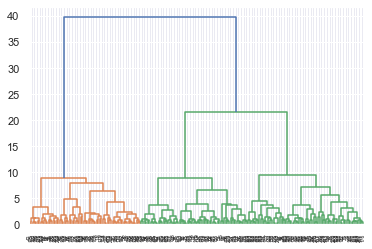

In [32]:
dend = dendrogram(HClust)

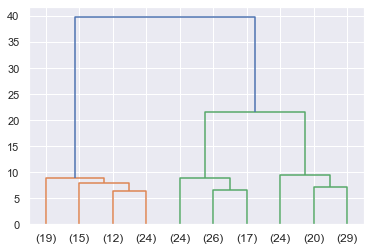

In [33]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [34]:
from scipy.cluster.hierarchy import fcluster

In [203]:
clusters_1 = fcluster(HClust, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [36]:
clusters_2 = fcluster(HClust, 30, criterion='distance')
clusters_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [40]:
from sklearn.cluster import KMeans 

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [38]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_df)
k_means2.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [43]:
k_means2.inertia_

659.1717544870411

In [42]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999995

In [45]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

430.65897315130064

In [44]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

371.38509060801107

In [48]:
wss =[] 

In [49]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [50]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603,
 223.91254221002728,
 206.3961218478669]

In [51]:
a=[1,2,3,4,5,6,7,8,9,10]

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

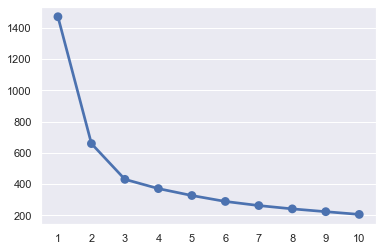

In [52]:
sns.pointplot(a,wss)

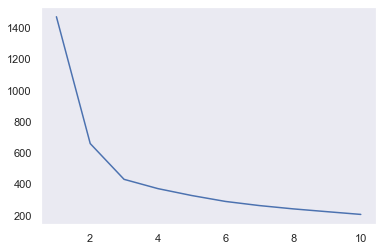

In [55]:
plt.plot(range(1,11), wss)
plt.grid()
plt.show()

### KMeans with K=2

In [125]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [126]:
silhouette_score(scaled_df,labels,random_state=1)

0.46577247686580914

### KMeans with K=3

In [127]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

#### Cluster evaluation for 3 clusters: the silhouette score

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [128]:
silhouette_score(scaled_df,labels,random_state=1)

0.40072705527512986

### KMeans with K=4

In [129]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [130]:
silhouette_score(scaled_df,labels,random_state=1)

0.3276547677266192

In [211]:
df["Clus_kmeans"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,3
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,3
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,3


In [214]:
df["Clus_kmeans"].value_counts()

1    66
0    65
3    49
2    30
Name: Clus_kmeans, dtype: int64

In [216]:
clust_profile=df.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans,,,,,,,,
0,11.816462,13.242154,0.846060,5.237600,2.834354,4.919415,5.121846,65
1,13.992576,14.114697,0.881241,5.431939,3.213318,2.591624,5.030470,66
2,16.317333,15.288000,0.876877,5.864800,3.444433,3.868567,5.686533,30
3,19.120000,16.459184,0.886686,6.267265,3.768612,3.472980,6.125878,49


#### OBSERVATION

silhouette score is better for 3 clusters than 4 for clusters. So, final clusters will be 3.

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

The clusters can be defined as the three group pattern solution : (and leave 2 reason being the least no. of value count.
    Medium - 1
    Low - 0
    High -3
    The high, medium and low spenders with Max Spent in Single Shopping (highly valued items) and the Probability of Full Payment (payment made).
    
    OBSERVATION:
Cluster 0:
The average spending of this group is 11.816 (in 1000s), which is medium among the 3
clusters. It has the most advance payments 13.242 (in 100s).
Probability of FullPayment is on the higher side, averaging around 0.846. Current Balance is around 5.237(in
1000s) which is average among three clusters. Credit Limit is around 2.834 (in 10000s) which
is average among three clusters. Min Payment Amt is 4.919 (in 100s) which is least among
three cluster. Max Spent in Single Shopping is the least around 5.120 (in 1000s).

Cluster 1:
The average Spending of this cluster is 13.99 which is the lowest among all the 3 clusters.
Advance Payment is lowest among the three clusters which is 14.11. Probability of Full
Payment is the least amongst other clusters, averaging around 0.88. Current Balance is
around 5.43 which is least among three clusters. Credit Limit is least for this cluster ranging
around 3.21. Min Payment Amt is 2.59 which is the maximum. Max Spent in Single
Shopping is around 5.030.

Cluster 3:
The average Spending is highest of this cluster, around 19.12. Advance payments around
16.203 which is highest among three clusters Probability of Full Payment is very high,
averaging around 0.88 which is highest among three clusters. Current Balance is around
6.62 which is highest among three clusters. Credit Limit is 3.76 which is highest among the
three clusters. Min Payment Amt is 3.47. And also, Max Spent in Single Shopping is around
6.12, which is higher comparatively to other clusters.

Recommendations:

Cluster 0 (Medium Spending):
Medium Spending customers are very important as they are the potential customers and they
are paying their respective bills and are making purchases and have been maintaining a good
credit score. So we can increase their credit limit or we can lower their interest rate. Promotion
of premium cards or loyalty, cars could lead to an increased transaction. We could also increase
their spending habits by introducing them to premium e commerce sites, travel portals,
airlines, hotels as this will help in inducing them to spend more.

Cluster 1 (Low Spending):
Low Spending customers should be given timely reminders for their respective payments.
Offers can be provided by early payments to improve their payment rate. Increase their
spending habits by tying them up with grocery stores, utilities (electricity, phone bills, gas etc.)


Cluster 3 (High Spending):
Maximum Max Spent in Single Shopping is the highest for this particular segment. Hence, they
can be offered with discounts or offers on next transactions upon their full payment. Increase
their credit limit which will increase their spending habits. Provide loans or mortgages against
the credit card, as they are customers who have exhibited good repayment record. They should
be tied up with luxury brands, which will increase one time maximum spending.

## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [63]:
data = pd.read_csv('/Users/damini/Downloads/insurance_part2_data.csv')

In [64]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [65]:
#SHAPE

print('The number of rows of the dataframe is',data.shape[0],'.')

print('The number of columns of the dataframe is',data.shape[1],'.')

The number of rows of the dataframe is 3000 .
The number of columns of the dataframe is 10 .


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [67]:
data.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [68]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [70]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) 

Number of duplicate rows = 139


In [71]:
data[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### UNIVARIATE ANALYSIS 

In [72]:
data_numerical=["Age","Commision","Duration","Sales"]

Description of Age variable
Minimum Value:  8
Maximum Value:  84
Mean Value:  38.091
Standard Deviation Value:  10.463518245377944
skewness Value:  1.149712770495169
.................................................................................
Boxplot of Age


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


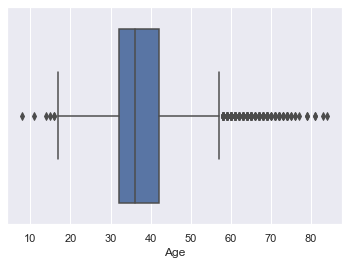

.................................................................................
Histogram of Age


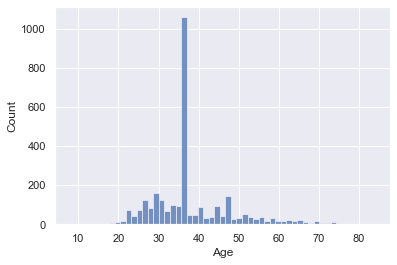

.................................................................................
Distplot of Age


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


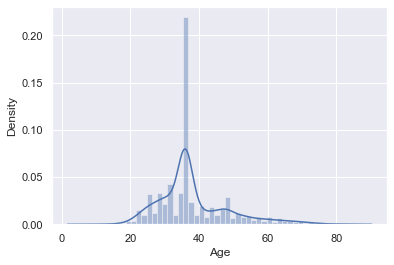

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Commision variable
Minimum Value:  0.0
Maximum Value:  210.21
Mean Value:  14.529203333333266
Standard Deviation Value:  25.48145450662553
skewness Value:  3.148857772356885
.................................................................................
Boxplot of Commision


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


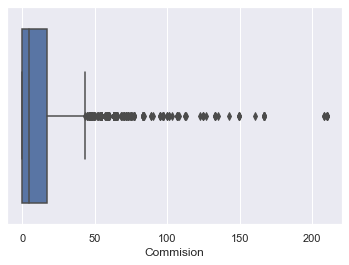

.................................................................................
Histogram of Commision


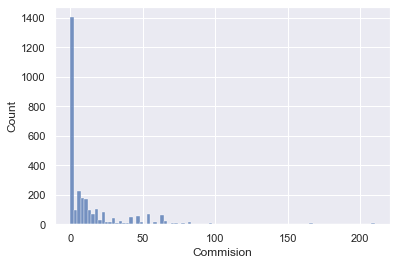

.................................................................................
Distplot of Commision


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


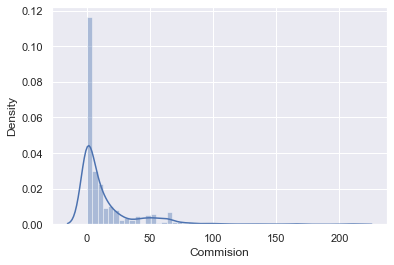

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Duration variable
Minimum Value:  -1
Maximum Value:  4580
Mean Value:  70.00133333333333
Standard Deviation Value:  134.05331313253495
skewness Value:  13.784681027519602
.................................................................................
Boxplot of Duration


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


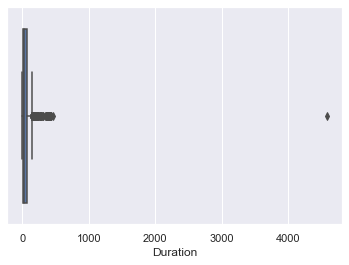

.................................................................................
Histogram of Duration


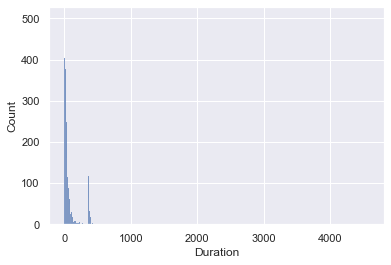

.................................................................................
Distplot of Duration


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


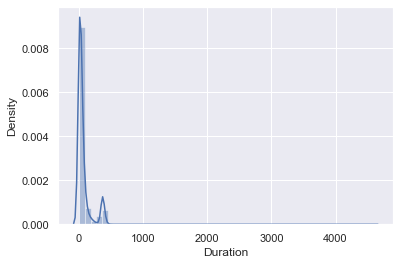

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Sales variable
Minimum Value:  0.0
Maximum Value:  539.0
Mean Value:  60.24991333333344
Standard Deviation Value:  70.73395353143047
skewness Value:  2.381148461687274
.................................................................................
Boxplot of Sales


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


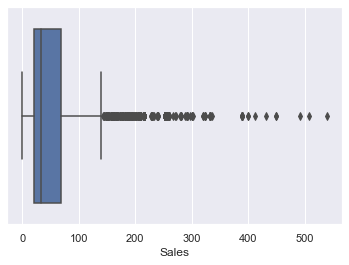

.................................................................................
Histogram of Sales


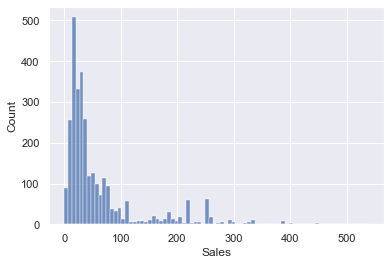

.................................................................................
Distplot of Sales


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


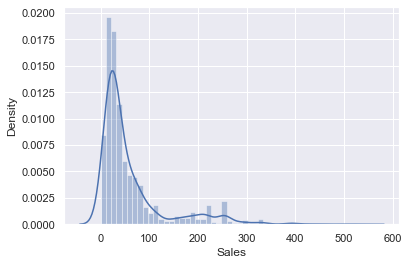

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [73]:
for i in data_numerical:
    print("Description of {} variable".format(i))
    print("Minimum Value: ",data[i].min())
    print("Maximum Value: ",data[i].max())
    print("Mean Value: ",data[i].mean())
    print("Standard Deviation Value: ",data[i].std())
    print("skewness Value: ",data[i].skew())
    print(".................................................................................")
    
    
    print("Boxplot of {}".format(i))
    sns.boxplot(data[i])
    plt.show()
    print(".................................................................................")
    
    
    print("Histogram of {}".format(i))
    sns.histplot(data[i])
    plt.show()
    print(".................................................................................")
    
    print("Distplot of {}".format(i))
    sns.distplot(data[i])
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

In [74]:
data_categorical = ["Agency_Code","Type","Claimed","Channel","Product Name","Destination"]

Description of Agency_Code variable
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


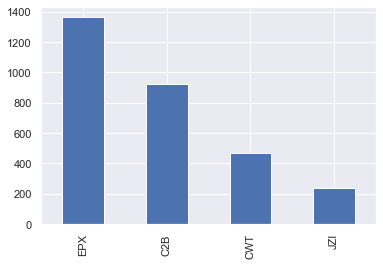

-----------------------------------------------------------------------------------------
Boxplot of Agency_Code


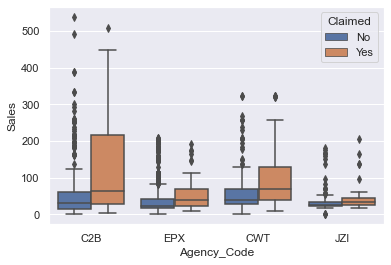

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Type variable
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


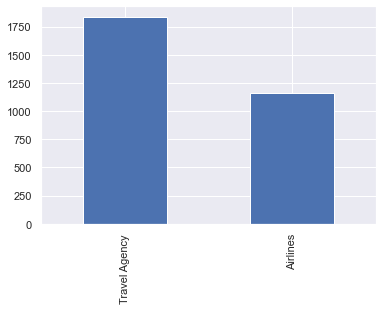

-----------------------------------------------------------------------------------------
Boxplot of Type


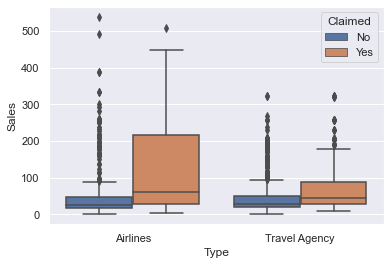

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Claimed variable
No     2076
Yes     924
Name: Claimed, dtype: int64


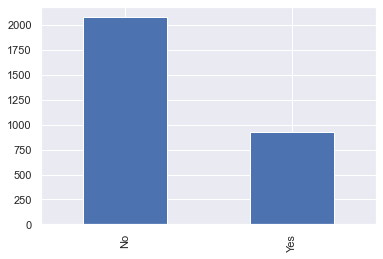

-----------------------------------------------------------------------------------------
Boxplot of Claimed


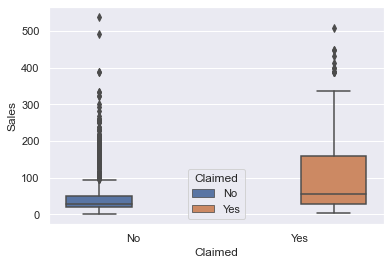

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Channel variable
Online     2954
Offline      46
Name: Channel, dtype: int64


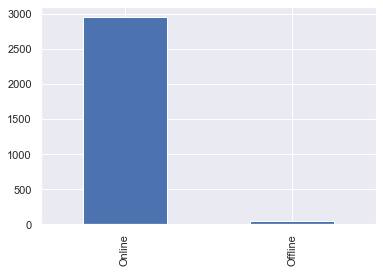

-----------------------------------------------------------------------------------------
Boxplot of Channel


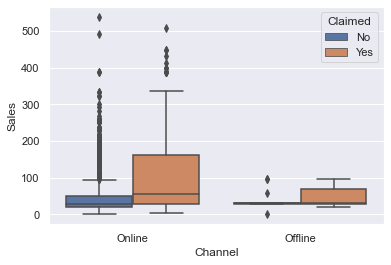

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Product Name variable
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


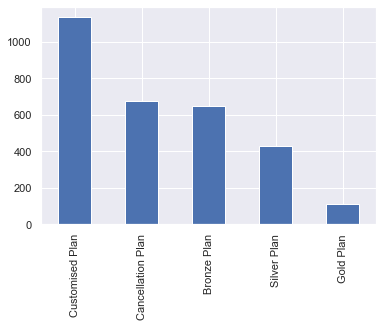

-----------------------------------------------------------------------------------------
Boxplot of Product Name


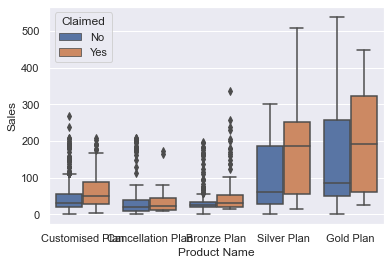

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Destination variable
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


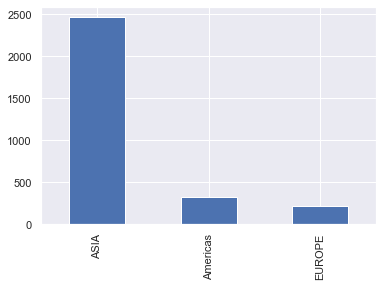

-----------------------------------------------------------------------------------------
Boxplot of Destination


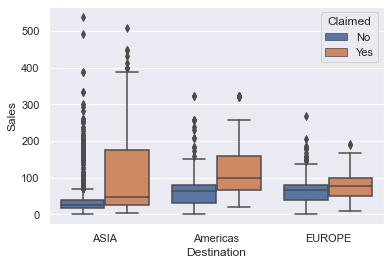

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [75]:
for i in data_categorical:
    print("Description of {} variable".format(i))
    print(data[i].value_counts())
    data[i].value_counts().plot(kind = "bar")
    plt.show()
    print("-----------------------------------------------------------------------------------------")
    
    print("Boxplot of {}".format(i))
    sns.boxplot(data = data,x=i,y='Sales',hue="Claimed")
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    

##### OBSERVATION
- “EPX” is the most preferred agency_code.
- “Travel Agency” is the most preferred type.
- “Online” is the most preferred channel.
- “Customised Plan” is the most preferred product name.
- “ASIA” is the most preferred destination”.
- The box plot above presents us with the split of &#39;Sales&#39; and also having hued with &#39;Claimed&#39;
Column for all the categorical variables.

### BIVARIATE ANALYSIS :

<Figure size 1440x1440 with 0 Axes>

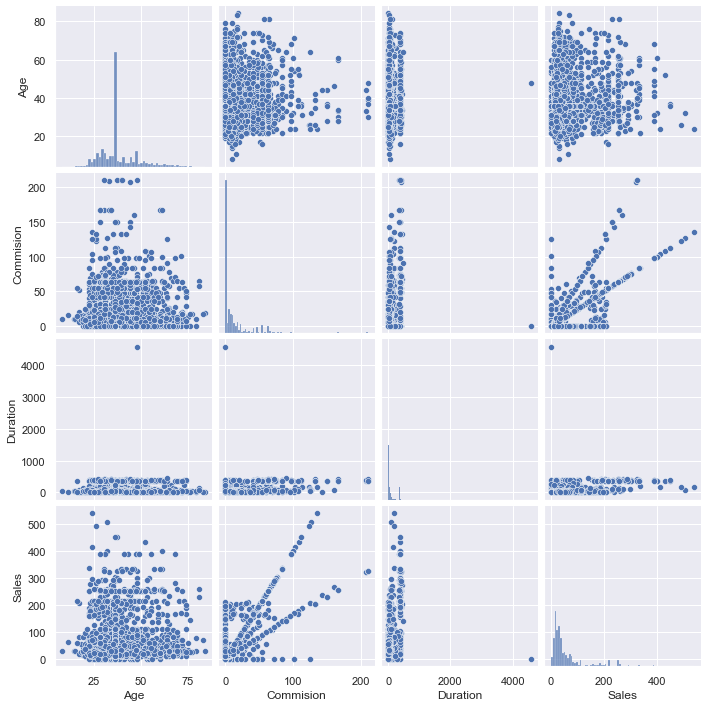

In [76]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

The bivariate analysis shown using a pairplot is a visual representation of the degree of correlation between any two columns.

- Sales &amp; Commision show a relationship between them.
- Sales &amp; Duration go hand by hand, if duration increases, sales also increase.
- No relationship between Sales &amp; Age.

In [77]:
data.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


### MULTIVARIATE ANALYSIS :

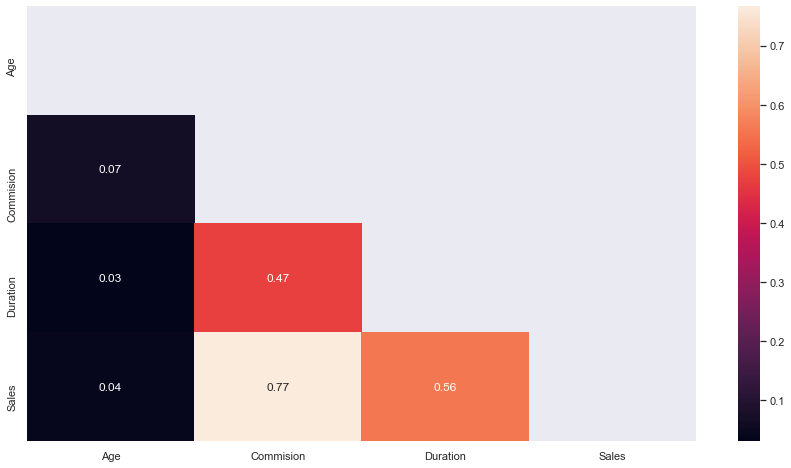

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,fmt=".2f",mask=np.triu(data.corr(),0));

#### OBSERVATION :

Here, highest correlation has been observed between sales and commision as higher the sale more the commision and least has been observed between duration and age etc.

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
print('Agency_Code \n',data.Agency_Code.value_counts())
print('\n')
print('Type \n',data.Type.value_counts())
print('\n')
print('Claimed \n',data.Claimed.value_counts())
print('\n')
print('Channel \n',data.Channel.value_counts())
print('\n')
print('Product Name \n',data['Product Name'].value_counts())
print('\n')
print('Destination \n',data.Destination.value_counts())

Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


In [81]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [82]:
print('Agency_Code \n',data.Agency_Code.value_counts())
print('\n')
print('Type \n',data.Type.value_counts())
print('\n')
print('Claimed \n',data.Claimed.value_counts())
print('\n')
print('Channel \n',data.Channel.value_counts())
print('\n')
print('Product Name \n',data['Product Name'].value_counts())
print('\n')
print('Destination \n',data.Destination.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [84]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [86]:
data.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = data.drop("Claimed", axis=1)
y = data.pop("Claimed")

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [91]:
X_scaled = sc.fit_transform(X)

In [92]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=0)

In [93]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("train_labels:",train_labels.shape)
print("test_labels:",test_labels.shape)

X_train: (2100, 9)
X_test: (900, 9)
train_labels: (2100,)
test_labels: (900,)


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid={"max_depth": [3,5,7,10,12,20,30,40,50],
            "min_samples_leaf": [30,35,40,50,60,70,80,100,150],
            "min_samples_split": [100,125,150,175,200,225,250,300]}
dtcl=DecisionTreeClassifier(random_state=0)
grid_search_dtcl=GridSearchCV(estimator=dtcl,param_grid=param_grid,cv=10)

In [99]:
grid_search_dtcl.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 10, 12, 20, 30, 40, 50],
                         'min_samples_leaf': [30, 35, 40, 50, 60, 70, 80, 100,
                                              150],
                         'min_samples_split': [100, 125, 150, 175, 200, 225,
                                               250, 300]})

In [100]:
grid_search_dtcl.best_params_

{'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 100}

In [101]:
best_grid_dtcl=grid_search_dtcl.best_estimator_

In [109]:
from sklearn import tree

train_char_label=["No","Yes"]
tree_regularized=open("tree_regularized.dot","w")
dot_data=tree.export_graphviz(best_grid_dtcl,out_file=tree_regularized,feature_names=list(X),class_names=list(train_char_label))
tree_regularized.close()
dot_data

In [110]:
ytrain_predict_dtcl=best_grid_dtcl.predict(X_train)
ytest_predict_dtcl=best_grid_dtcl.predict(X_test)

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
param_grid={"max_depth": [5,10,15],"min_samples_leaf": [4,5,6,7],
            "min_samples_split": [10,50,70],"n_estimators":[200,250,300]}
rfcl=RandomForestClassifier(random_state=0)
grid_search_rfcl=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=10)

In [116]:
grid_search_rfcl.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'min_samples_split': [10, 50, 70],
                         'n_estimators': [200, 250, 300]})

In [117]:
grid_search_rfcl.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 250}

In [118]:
best_grid_rfcl=grid_search_rfcl.best_estimator_

In [156]:
ytrain_predict_rfcl=best_grid_rfcl.predict(X_train)
ytest_predict_rfcl=best_grid_rfcl.predict(X_test)

In [119]:
from sklearn.neural_network import MLPClassifier

In [120]:
param_grid={"hidden_layer_sizes": [50,100,200],"max_iter": [2500,3000,4000],"solver":["adam","sgd"],"tol":[0.01]}
nncl=MLPClassifier(random_state=0)
grid_search_nncl=GridSearchCV(estimator=nncl,param_grid=param_grid,cv=10)

In [121]:
grid_search_nncl.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=0),
             param_grid={'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [2500, 3000, 4000],
                         'solver': ['adam', 'sgd'], 'tol': [0.01]})

In [122]:
grid_search_nncl.best_params_

{'hidden_layer_sizes': 50, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [123]:
best_grid_nncl=grid_search_nncl.best_estimator_

In [174]:
ytrain_predict_nncl=best_grid_nncl.predict(X_train)
ytest_predict_nncl=best_grid_nncl.predict(X_test)

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [132]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [ ]:
confusion_matrix(train_labels,ytrain_predict_dtcl)

In [ ]:
print(classification_report(train_labels,ytrain_dtcl))

In [ ]:
accuracy_cart=accuracy_score(train_labels,ytrain_dtcl)

In [136]:
cart_metrics=classification_report(train_labels,ytrain_predict_dtcl,output_dict=True)
data=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(data.loc["1"][0],2)
cart_train_recall=round(data.loc["1"][1],2)
cart_train_f1=round(data.loc["1"][2],2)
print("cart_train_precision: ",cart_train_precision)
print("cart_train_recall: ",cart_train_recall)
print("cart_train_f1: ",cart_train_f1)

cart_train_precision:  0.64
cart_train_recall:  0.62
cart_train_f1:  0.63


In [138]:
probs_cart=best_grid_dtcl.predict_proba(X_train)
probs_cart=probs_cart[:,1]
auc_cart=roc_auc_score(train_labels,probs_cart)
auc_cart

0.7947833969137712

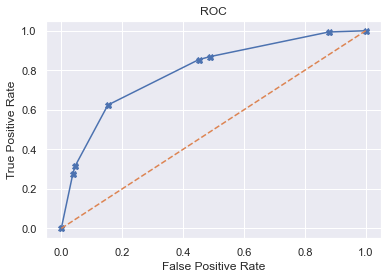

In [142]:
cart_train_fpr,cart_train_tpr,threshold=roc_curve(train_labels,probs_cart)
plt.plot(cart_train_fpr,cart_train_tpr,marker="X")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [143]:
confusion_matrix(train_labels,ytrain_predict_dtcl)

array([[1240,  224],
       [ 239,  397]])

In [144]:
print(classification_report(train_labels,ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1464
           1       0.64      0.62      0.63       636

    accuracy                           0.78      2100
   macro avg       0.74      0.74      0.74      2100
weighted avg       0.78      0.78      0.78      2100



In [146]:
accuracy_cart_test=accuracy_score(test_labels,ytest_predict_dtcl)

In [147]:
cart_metrics=classification_report(test_labels,ytest_predict_dtcl,output_dict=True)
data=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(data.loc["1"][0],2)
cart_test_recall=round(data.loc["1"][1],2)
cart_test_f1=round(data.loc["1"][2],2)
print("cart_test_precision: ",cart_test_precision)
print("cart_test_recall: ",cart_test_recall)
print("cart_test_f1: ",cart_test_f1)

cart_test_precision:  0.7
cart_test_recall:  0.62
cart_test_f1:  0.66


In [148]:
probs_cart=best_grid_dtcl.predict_proba(X_test)
probs_cart=probs_cart[:,1]
auc_cart=roc_auc_score(test_labels,probs_cart)
auc_cart

0.7952325027233116

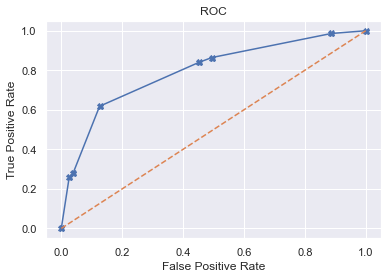

In [149]:
cart_test_fpr,cart_test_tpr,threshold=roc_curve(test_labels,probs_cart)
plt.plot(cart_test_fpr,cart_test_tpr,marker="X")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [157]:
confusion_matrix(train_labels,ytrain_predict_rfcl) 

array([[1311,  153],
       [ 250,  386]])

In [158]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1464
           1       0.72      0.61      0.66       636

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [159]:
accuracy_rf=accuracy_score(test_labels,ytest_predict_rfcl)

In [199]:
rf_metrics=classification_report(train_labels,ytrain_predict_dtcl,output_dict=True)
data=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(data.loc["1"][0],2)
rf_train_recall=round(data.loc["1"][1],2)
rf_train_f1=round(data.loc["1"][2],2)
print("rf_train_precision: ",rf_train_precision)
print("rf_train_recall: ",rf_train_recall)
print("rf_train_f1: ",rf_train_f1)

rf_train_precision:  0.67
rf_train_recall:  0.45
rf_train_f1:  0.54


In [163]:
probs_rf=best_grid_dtcl.predict_proba(X_train)
probs_rf=probs_rf[:,1]
auc_rf=roc_auc_score(train_labels,probs_rf)
auc_rf

0.7947833969137712

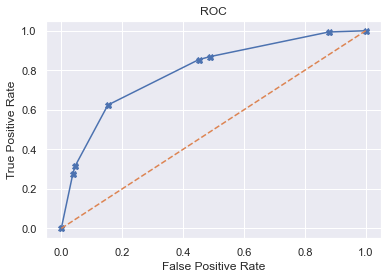

In [164]:
rf_train_fpr,rf_train_tpr,threshold=roc_curve(train_labels,probs_rf)
plt.plot(rf_train_fpr,rf_train_tpr,marker="X")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [165]:
accuracy_rf_test=accuracy_score(test_labels,ytest_predict_rfcl)

In [200]:
rf_metrics=classification_report(test_labels,ytest_predict_rfcl,output_dict=True)
data=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(data.loc["1"][0],2)
rf_test_recall=round(data.loc["1"][1],2)
rf_test_f1=round(data.loc["1"][2],2)
print("rf_test_precision: ",rf_test_precision)
print("rf_test_recall: ",rf_test_recall)
print("rf_test_f1: ",rf_test_f1)

rf_test_precision:  0.74
rf_test_recall:  0.57
rf_test_f1:  0.64


In [167]:
probs_rf=best_grid_rfcl.predict_proba(X_test)
probs_rf=probs_rf[:,1]
auc_rf=roc_auc_score(test_labels,probs_rf)
auc_rf

0.8448705292302107

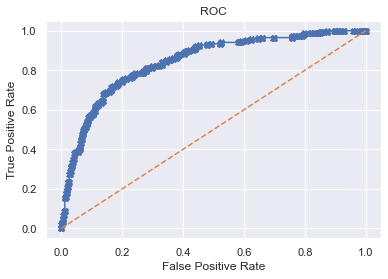

In [169]:
rf_test_fpr,rf_test_tpr,threshold=roc_curve(test_labels,probs_rf)
plt.plot(rf_test_fpr,rf_test_tpr,marker="X")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [175]:
confusion_matrix(train_labels,ytrain_predict_nncl) 

array([[1326,  138],
       [ 350,  286]])

In [176]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1464
           1       0.67      0.45      0.54       636

    accuracy                           0.77      2100
   macro avg       0.73      0.68      0.69      2100
weighted avg       0.76      0.77      0.75      2100



In [177]:
accuracy_nn=accuracy_score(test_labels,ytest_predict_nncl)

In [201]:
nn_metrics=classification_report(train_labels,ytrain_predict_nncl,output_dict=True)
data=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(data.loc["1"][0],2)
nn_train_recall=round(data.loc["1"][1],2)
nn_train_f1=round(data.loc["1"][2],2)
print("nn_train_precision: ",nn_train_precision)
print("nn_train_recall: ",nn_train_recall)
print("nn_train_f1: ",nn_train_f1)

nn_train_precision:  0.67
nn_train_recall:  0.45
nn_train_f1:  0.54


In [179]:
probs_nn=best_grid_nncl.predict_proba(X_train)
probs_nn=probs_nn[:,1]
auc_nn=roc_auc_score(train_labels,probs_nn)
auc_nn

0.780311329346668

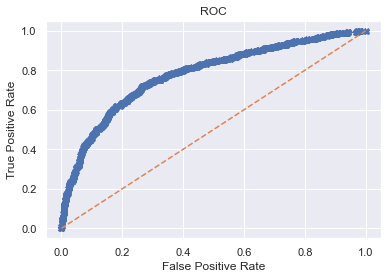

In [180]:
nn_train_fpr,nn_train_tpr,threshold=roc_curve(train_labels,probs_nn)
plt.plot(nn_train_fpr,nn_train_tpr,marker="X")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [181]:
accuracy_nn_test=accuracy_score(test_labels,ytest_predict_nncl)

In [202]:
nn_metrics=classification_report(test_labels,ytest_predict_nncl,output_dict=True)
data=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(data.loc["1"][0],2)
nn_test_recall=round(data.loc["1"][1],2)
nn_test_f1=round(data.loc["1"][2],2)
print("nn_test_precision: ",nn_test_precision)
print("nn_test_recall: ",nn_test_recall)
print("nn_test_f1: ",nn_test_f1)

nn_test_precision:  0.71
nn_test_recall:  0.47
nn_test_f1:  0.56


In [183]:
probs_nn=best_grid_nncl.predict_proba(X_test)
probs_nn=probs_nn[:,1]
auc_nn=roc_auc_score(test_labels,probs_nn)
auc_nn

0.7936439043209876

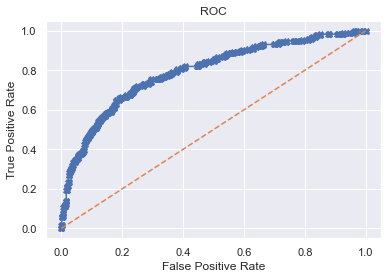

In [184]:
nn_test_fpr,nn_test_tpr,threshold=roc_curve(test_labels,probs_nn)
plt.plot(nn_test_fpr,nn_test_tpr,marker="X")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [189]:
index=["Accuracy","Area Under the curve","Recall","Precision","F1 Score"]
data=pd.DataFrame({"CART Train" :[accuracy_cart,auc_cart,cart_train_recall,cart_train_precision,cart_train_f1],
                  "CART Test":[accuracy_cart_test,auc_cart,cart_test_recall,cart_test_precision,cart_test_f1],
                  "Random Forest Train":[accuracy_rf,auc_rf,rf_train_recall,rf_train_precision,rf_train_f1],
                  "Random Forest Test":[accuracy_rf_test,auc_rf,rf_test_recall,rf_test_precision,rf_test_f1],
                  "Neural Network Train":[accuracy_nn,auc_nn,nn_train_recall,nn_train_precision,nn_train_f1],
                  "Neural Network Test": [accuracy_nn_test,auc_nn,nn_test_recall,nn_test_precision,nn_test_f1]})
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
0,0.78,0.78,0.80,0.80,0.77,0.77
1,0.80,0.80,0.84,0.84,0.79,0.79
2,0.62,0.62,0.62,0.57,0.45,0.47
3,0.64,0.70,0.64,0.74,0.67,0.71
4,0.63,0.66,0.63,0.64,0.54,0.56


Indexing - Comparing accuracy -0, area under the curve-1, recall-2, precision-3, f1 score-4

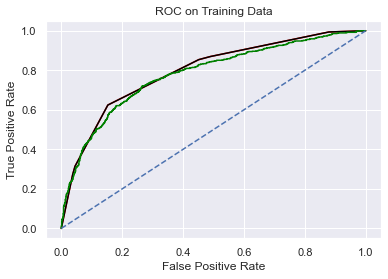

In [196]:
plt.plot(cart_train_fpr,cart_train_trp,color="red",label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color="black",label="Random Forest")
plt.plot(nn_train_fpr,nn_train_tpr,color="green",label="Neural Network")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC on Training Data")
plt.show()

#### Red : CART , Black : Random Forest, Green : Neural Network



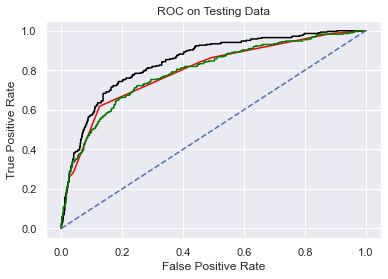

In [198]:
plt.plot(cart_test_fpr,cart_test_tpr,color="red",label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color="black",label="Random Forest")
plt.plot(nn_test_fpr,nn_test_tpr,color="green",label="Neural Network")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC on Testing Data")
plt.show()

#### Red : CART , Black : Random Forest, Green : Neural Network

##### COUNCLUSION :
Out of all the three models, Random Forest model shows better performance than CART and Neural Network.
Overall all the three models are reasonable enough to be used as the predictive model for making furture predictions. The variable change feature in CART and Random Forest has been found the most useful.

### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations.



### Business Insights and Recommendation:

- The thing to noted is that practically all the offline business has a claim related with them.
- JZI agency resources should be trained to increase their sales as they are the lower part of the
list. They need to run limited time promoting efforts or assess assuming they want to collaborate
with a substitute organization.
- According to the information 90% of the incurance was claimed by online channel.
- Likewise, based on the model we are getting 80% exactness. Consequently, we want to actuate our
clients to book airline tickets or plans, strategically pitch the incurance in view of the claim information
data.
- Another intriguing fact is more deals are occurring through Agency when compared to
Airline and the pattern shows that claims are done more at Airline. Thusly, we
may need to jump profound into the cycle to comprehend the work process and the explanations for
such events and example.

The key information to be taken from the Insurance claims are:
- Combat fraudulents transcations,immediately measures to be taken to stay away from such transactions at the
earliest.
- Advancements claim recovery methods.
- Lessen claim handling cost.
- Increase consumer loyalty which will thusly give more income.